In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from starkiller import *
import matplotlib.pyplot as plt
%matplotlib notebook

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig_width_pt = 240.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches

Number of sources brighter than 25: 678
wcs shift:  [2.58055556e+01 3.37962963e-04 2.98611111e-04]
Coords transformed
Calculating PSF coord shift
[ 6.90413173 26.98333927 12.04073071 77.7574935  50.90372494]
[ 60.18352101   6.66678504 187.97003404 178.66494698 143.40042586]
PSF shift:  [-9.69947103e-01 -3.03095739e+00  3.10719757e-10]


<IPython.core.display.Javascript object>


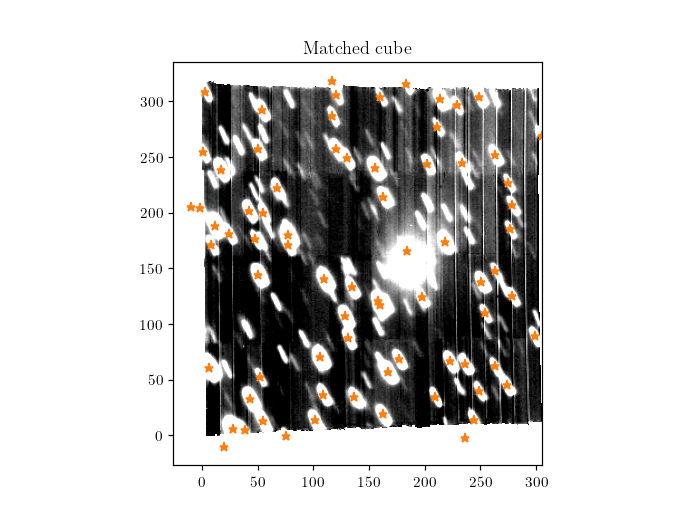

!!! Large difference of 0.13 between model_psf and data_psf!!!
Using the data_psf, override by setting psf_preference='model'
Made PSF
Warning, 6 of 3681 bins contained negative fluxes; they have been set to zero.
Extracted spectra
Background added


<IPython.core.display.Javascript object>


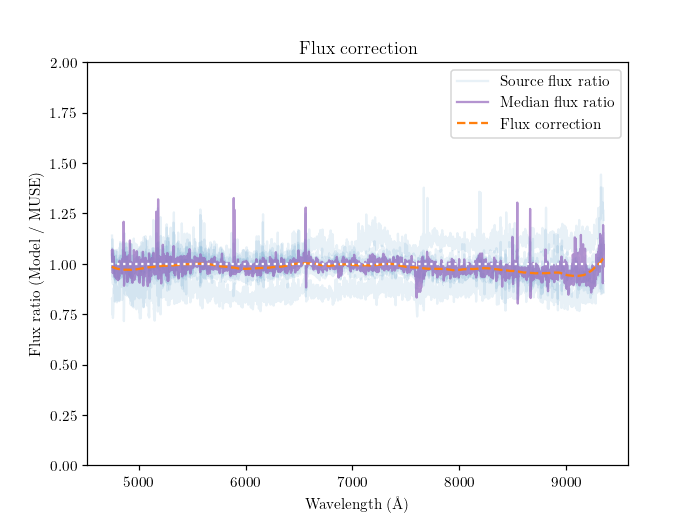

<IPython.core.display.Javascript object>


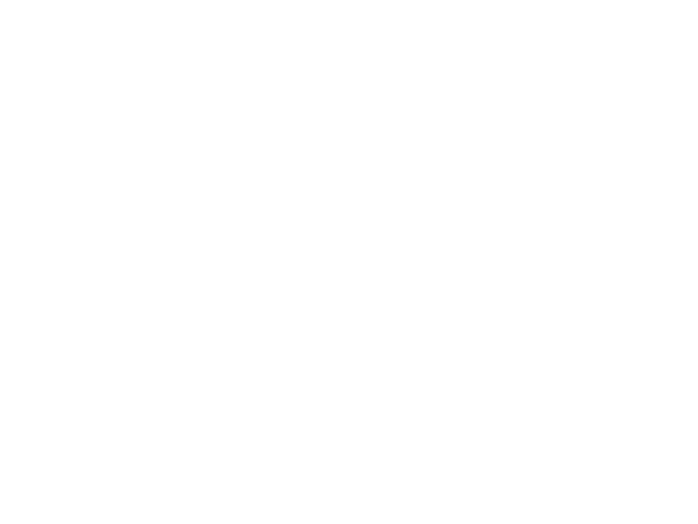

<IPython.core.display.Javascript object>


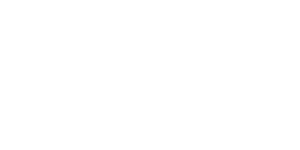

<IPython.core.display.Javascript object>


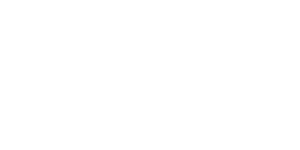

<IPython.core.display.Javascript object>


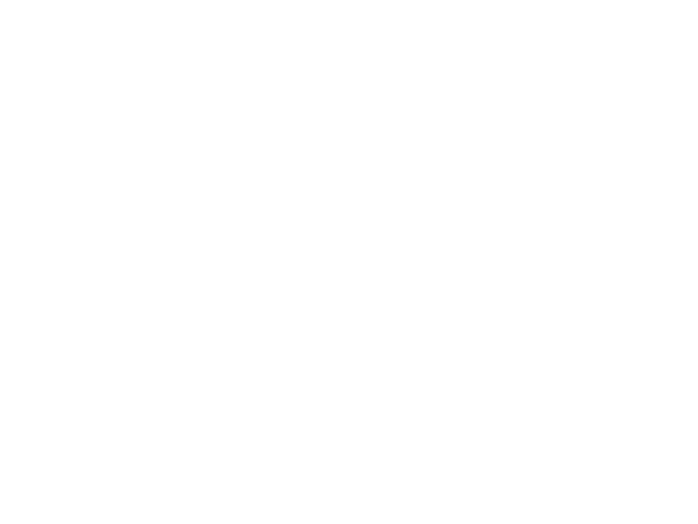

<IPython.core.display.Javascript object>


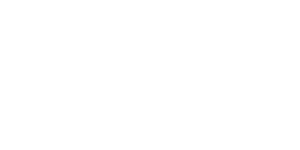

<IPython.core.display.Javascript object>


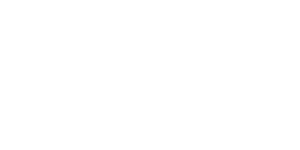

<IPython.core.display.Javascript object>


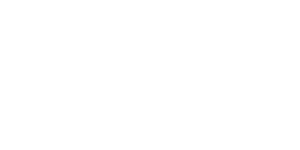

<IPython.core.display.Javascript object>


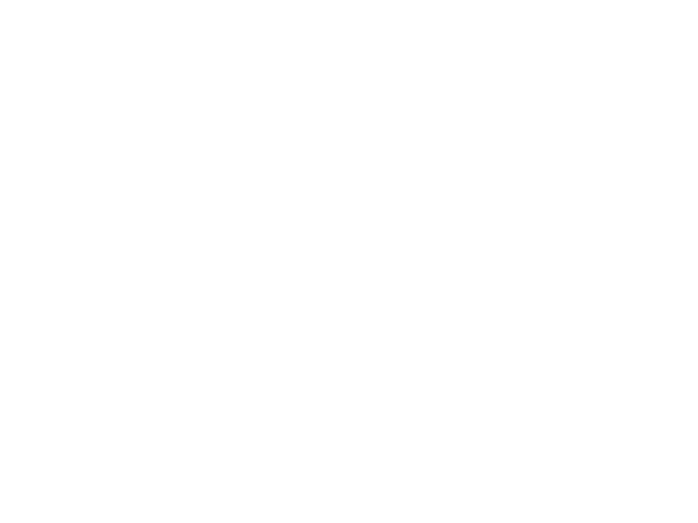

<IPython.core.display.Javascript object>


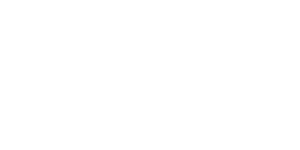

<IPython.core.display.Javascript object>


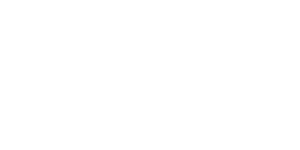

<IPython.core.display.Javascript object>


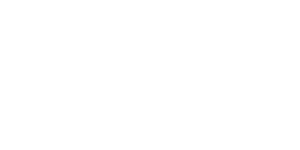

<IPython.core.display.Javascript object>


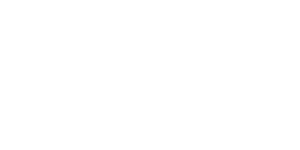

<IPython.core.display.Javascript object>


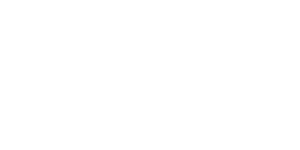

<IPython.core.display.Javascript object>


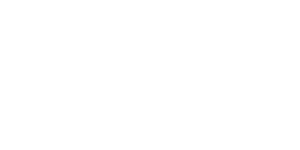

<IPython.core.display.Javascript object>


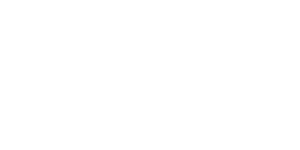

<IPython.core.display.Javascript object>


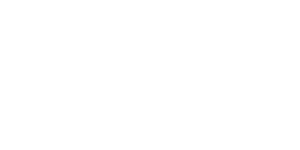

<IPython.core.display.Javascript object>


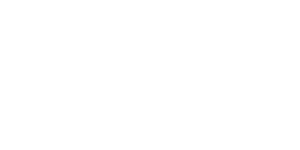

<IPython.core.display.Javascript object>


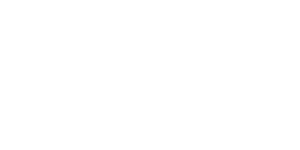

<IPython.core.display.Javascript object>


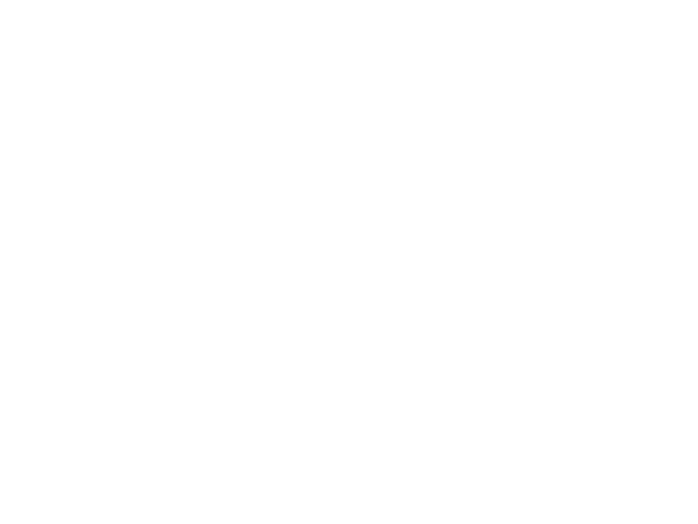

<IPython.core.display.Javascript object>


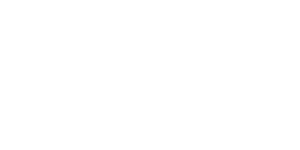

<IPython.core.display.Javascript object>


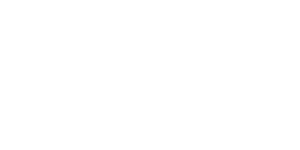

<IPython.core.display.Javascript object>


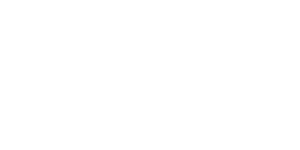

<IPython.core.display.Javascript object>


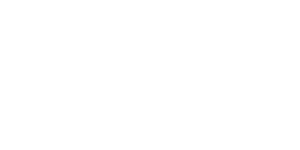

<IPython.core.display.Javascript object>


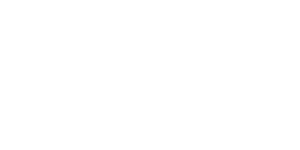

<IPython.core.display.Javascript object>


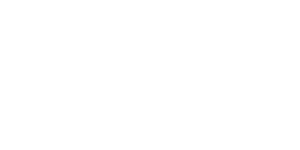

<IPython.core.display.Javascript object>


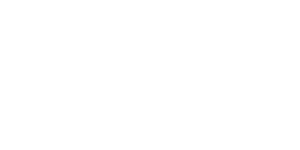

<IPython.core.display.Javascript object>


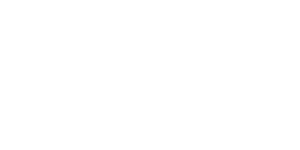

<IPython.core.display.Javascript object>


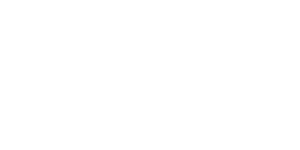

<IPython.core.display.Javascript object>


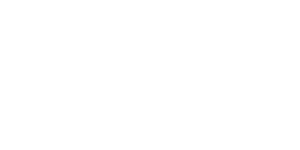

<IPython.core.display.Javascript object>


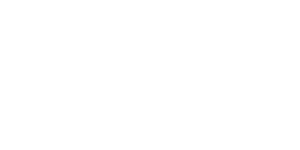

<IPython.core.display.Javascript object>


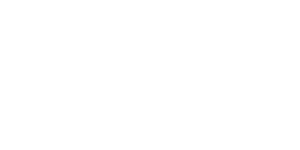

<IPython.core.display.Javascript object>


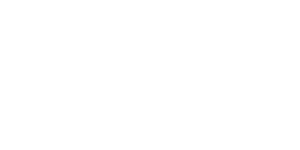

<IPython.core.display.Javascript object>


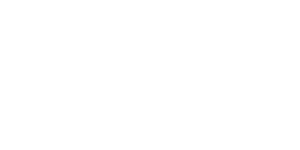

<IPython.core.display.Javascript object>


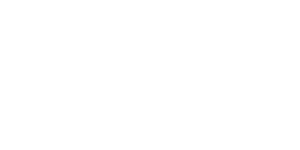

<IPython.core.display.Javascript object>


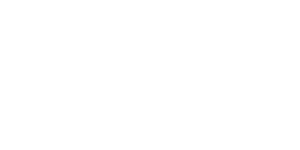

<IPython.core.display.Javascript object>


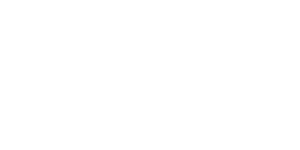

<IPython.core.display.Javascript object>


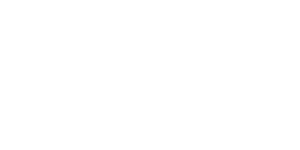

<IPython.core.display.Javascript object>


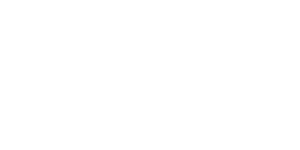

<IPython.core.display.Javascript object>


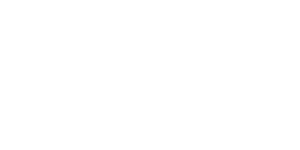

<IPython.core.display.Javascript object>


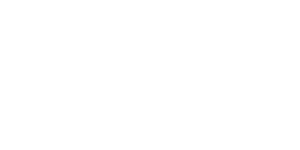

<IPython.core.display.Javascript object>


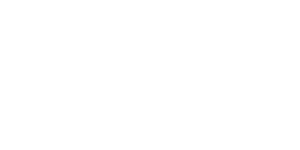

<IPython.core.display.Javascript object>


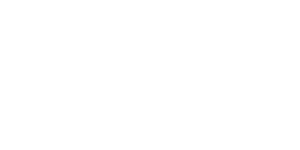

<IPython.core.display.Javascript object>


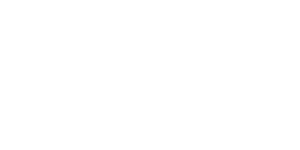

<IPython.core.display.Javascript object>


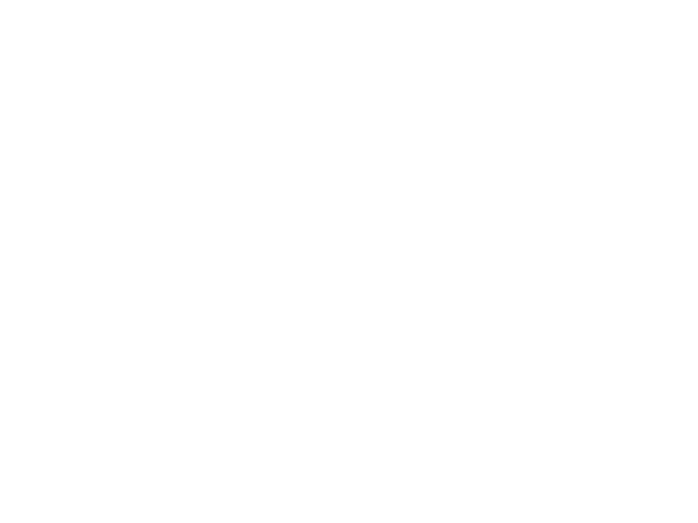

<IPython.core.display.Javascript object>


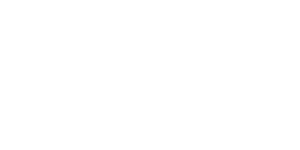

<IPython.core.display.Javascript object>


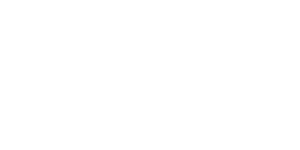

<IPython.core.display.Javascript object>


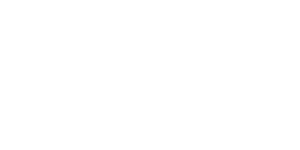

<IPython.core.display.Javascript object>


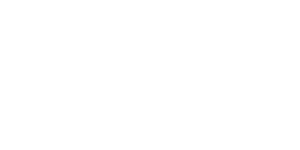

<IPython.core.display.Javascript object>


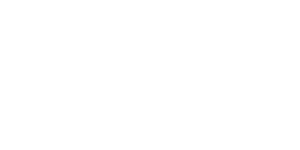

<IPython.core.display.Javascript object>


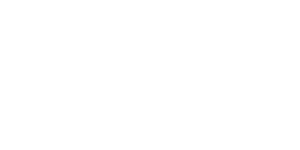

<IPython.core.display.Javascript object>


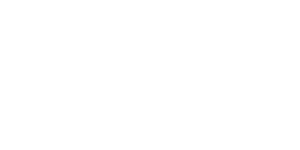

<IPython.core.display.Javascript object>


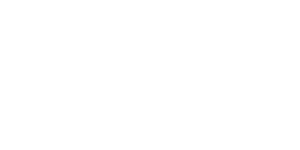

<IPython.core.display.Javascript object>


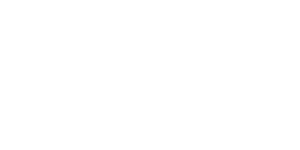

<IPython.core.display.Javascript object>


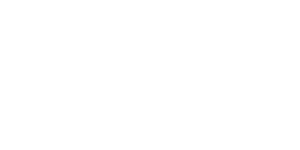

<IPython.core.display.Javascript object>


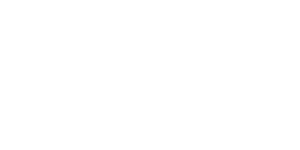

<IPython.core.display.Javascript object>


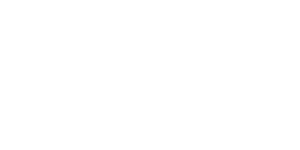

<IPython.core.display.Javascript object>


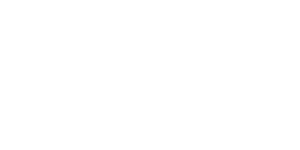

<IPython.core.display.Javascript object>


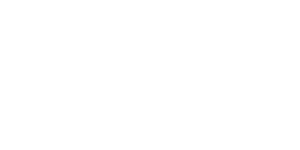

<IPython.core.display.Javascript object>


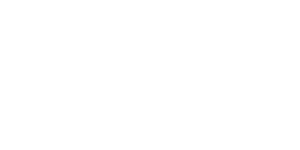

Warning, 6 of 3681 bins contained negative fluxes; they have been set to zero.


<IPython.core.display.Javascript object>


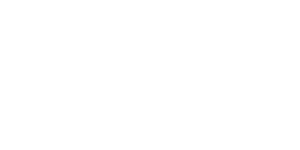

<IPython.core.display.Javascript object>


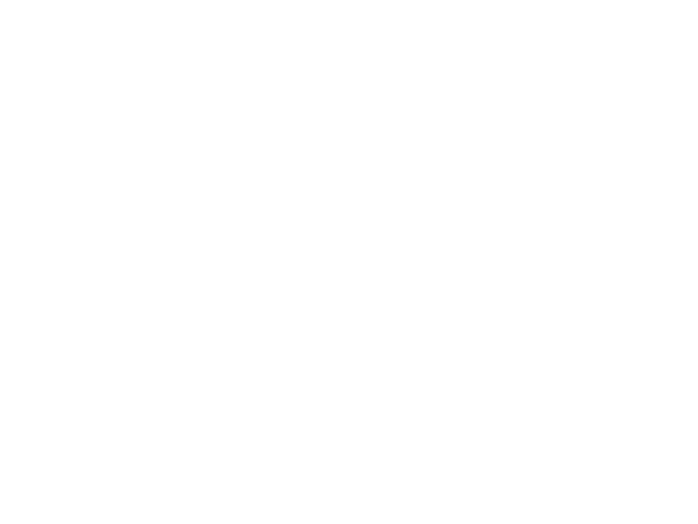

<IPython.core.display.Javascript object>


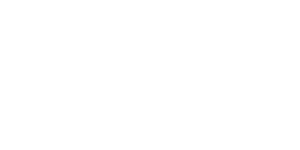

<IPython.core.display.Javascript object>


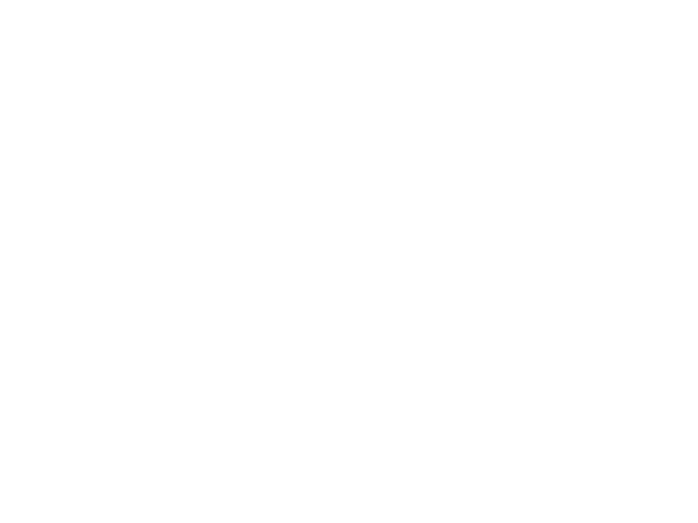

<IPython.core.display.Javascript object>


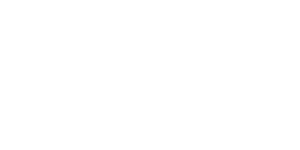

<IPython.core.display.Javascript object>


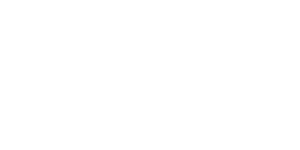

<IPython.core.display.Javascript object>


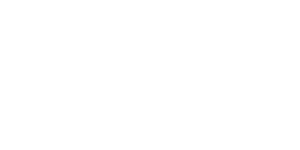

<IPython.core.display.Javascript object>


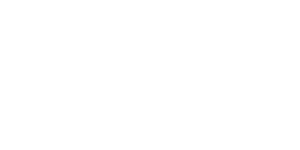

<IPython.core.display.Javascript object>


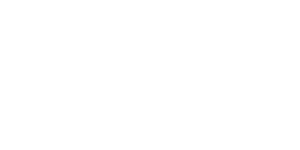

Using the data PSF
Made scene


<IPython.core.display.Javascript object>


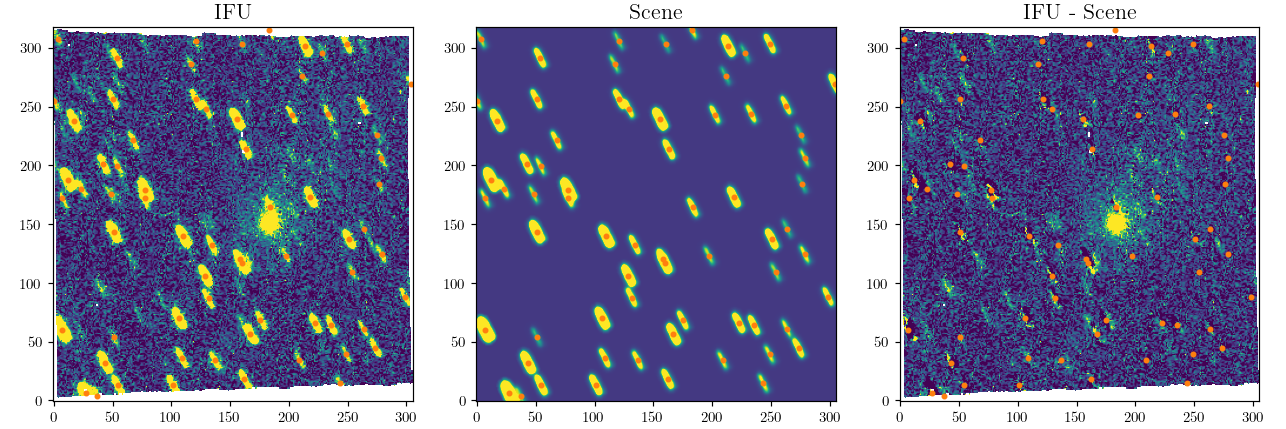

Saved reduction


In [23]:
test = starkiller(file='../2I_DATACUBE_FINAL_2020-03-19T05:46:49.016.fits',cal_maglim=18,run=True,numcores=7,spec_catalog='ck+',psf_profile='gaussian',plot=True,savepath='updated_code')



In [30]:
test.header0

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2020-04-14T12:21:53' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
ORIGIN  = 'ESO-PARANAL'        / European Southern Observatory                  
TELESCOP= 'ESO-VLT-U4'         / ESO <TEL>                                      
INSTRUME= 'MUSE    '           / Instrument used.                               
RA      =           192.866371 / [deg] 12:51:27.9 RA (J2000) pointing           
DEC     =            -69.13484 / [deg] -69:08:05.4 DEC (J2000) pointing         
EQUINOX =                200

<IPython.core.display.Javascript object>


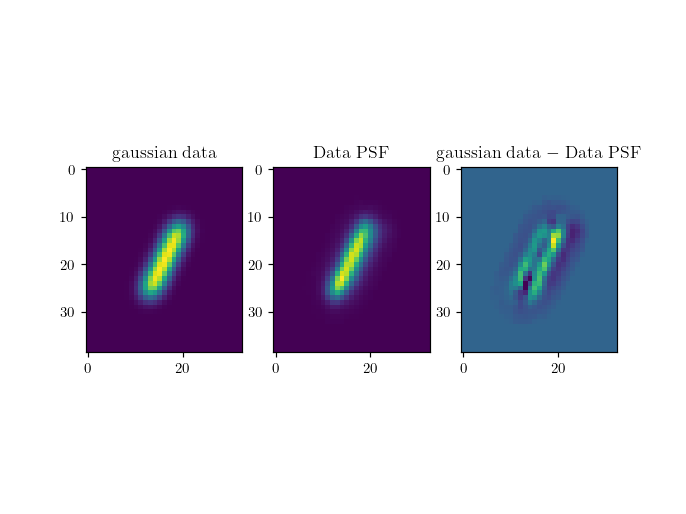

In [24]:
test.plot_psf()

<IPython.core.display.Javascript object>


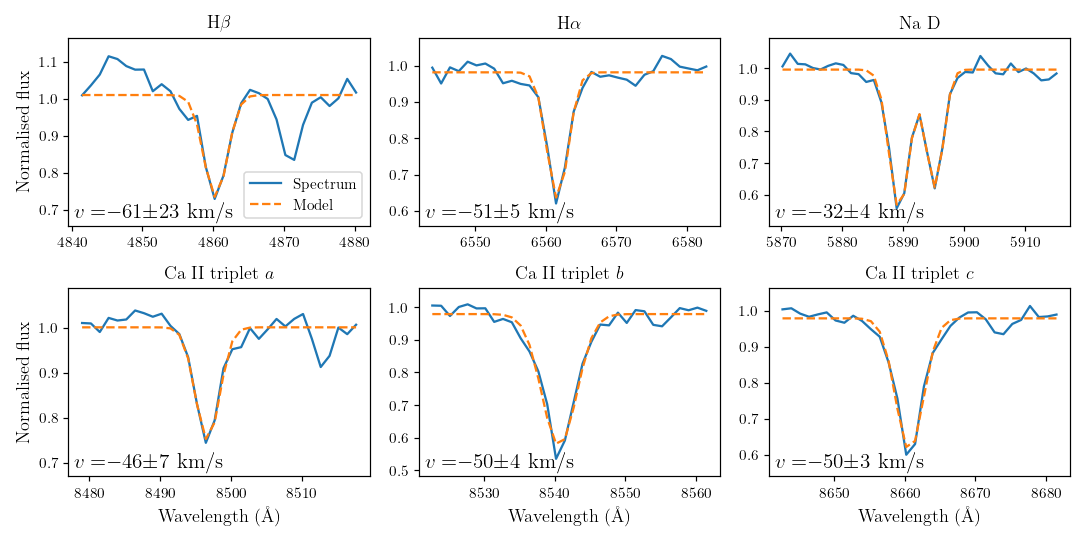

In [6]:
plot_z_shifts(test.specs[0])
plt.savefig('redshift_example.pdf',bbox_inches='tight')

In [19]:
x,y,_=test.wcs.all_world2pix(test.cat.ra.values,test.cat.dec.values,0,0)

<IPython.core.display.Javascript object>


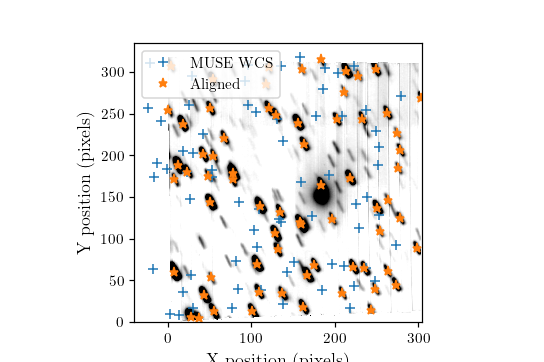

Text(0, 0.5, 'Y position (pixels)')

In [20]:
plt.figure(figsize=(1.5*fig_width,1*fig_width))
plt.imshow(test.image,vmin=0,vmax=20,origin='lower',cmap='gray_r')
plt.plot(x,y,'C0+',label='MUSE WCS')
plt.plot(test.cat.x.values,test.cat.y.values,'C1*',label='Aligned')
plt.legend()

plt.xlabel('X position (pixels)',fontsize=12)
plt.ylabel('Y position (pixels)',fontsize=12)
#plt.tight_layout()
#plt.savefig('position_correction.pdf',bbox_inches='tight')

In [25]:
redind = int(np.where(test.cat.id.values == 5856950251941690752)[0])
blueind = int(np.where(test.cat.id.values == 5856950561179332352)[0])

In [26]:
red_spec = test.specs[redind]
blue_spec = test.specs[blueind]
red_model = test.models[redind]
blue_model = test.models[blueind]

<IPython.core.display.Javascript object>


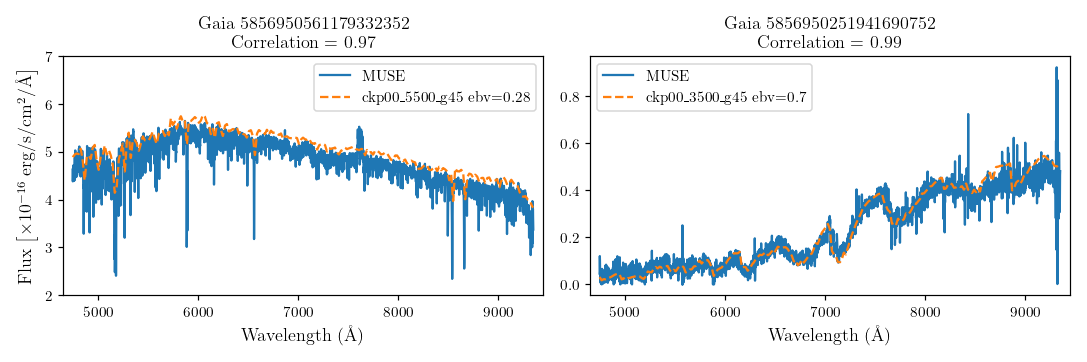

In [9]:
plt.figure(figsize=(1.5*fig_width*2,1*fig_width))
plt.subplot(121)
plt.title(f'Gaia 5856950561179332352 \nCorrelation = {np.round(test.cors[blueind],2)}')
plt.plot(blue_spec.wave,blue_spec.flux*1e16,label='MUSE')
plt.plot(blue_spec.wave,blue_model.sample(blue_spec.wave)/test.flux_corr*1e16,'--',label = blue_model.name)

plt.ylabel(r'Flux $\left[\rm \times10^{-16}\; erg/s/cm^2/\AA\right]$',fontsize=12)
plt.xlabel(r'Wavelength ($\rm \AA$)',fontsize=12)

plt.xlim(min(red_spec.wave)-100,max(red_spec.wave)+100)
plt.ylim(2,7)

plt.legend()

plt.subplot(122)
plt.title(f'Gaia 5856950251941690752 \nCorrelation = {np.round(test.cors[redind],2)}')
plt.plot(red_spec.wave,red_spec.flux*1e16,label='MUSE')
plt.plot(red_spec.wave,red_model.sample(red_spec.wave)/test.flux_corr*1e16,'--',label = red_model.name)

plt.xlabel(r'Wavelength ($\rm \AA$)',fontsize=12)

plt.xlim(min(red_spec.wave)-100,max(red_spec.wave)+100)

plt.legend()

plt.tight_layout()

#plt.savefig('Spec_match_example.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


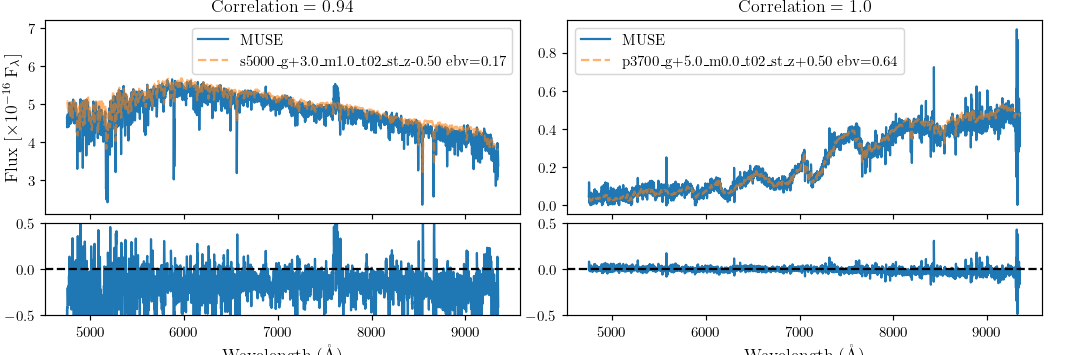

In [28]:
blue_model = test.models[blueind]

fig, axs = plt.subplot_mosaic('''
                               AB
                               AB
                               CD
                               ''',
                              figsize=(1.5*fig_width*2,1*fig_width))
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.subplots_adjust(wspace=0.1)

axs['A'].plot(blue_spec.wave,blue_spec.flux*1e16,label='MUSE')
axs['A'].plot(blue_spec.wave,blue_model.sample(blue_spec.wave)/test.flux_corr*test.cat['containment'].values[blueind]*1e16,'--',label = blue_model.name,alpha=0.6)

axs['A'].set_title(f'Gaia 5856950561179332352 \nCorrelation = {np.round(test.cors[blueind],2)}')
#axs['A'].set_ylabel(r'Flux $\left[\rm \times10^{-16}\; erg/s/cm^2/\AA\right]$',fontsize=12)
axs['A'].set_ylabel(r'Flux $\left[\rm \times10^{-16}\; F_\lambda\right]$',fontsize=12)
axs['A'].set_ylim(2.1,7.2)
axs['A'].legend(loc=1)

axs['C'].plot(blue_spec.wave,-(blue_model.sample(blue_spec.wave)/test.flux_corr*test.cat['containment'].values[blueind]*1e16 - blue_spec.flux*1e16))
axs['C'].axhline(0,color='k',ls='--')
axs['C'].set_ylabel('Residual',fontsize=12)
axs['C'].set_ylim(-0.5,0.5)
axs['C'].set_xlabel(r'Wavelength ($\rm \AA$)',fontsize=12)

axs['B'].plot(red_spec.wave,red_spec.flux*1e16,label='MUSE')
axs['B'].plot(red_spec.wave,red_model.sample(red_spec.wave)/test.flux_corr*1e16,'--',label = red_model.name,alpha=0.6)
axs['B'].set_title(f'Gaia 5856950251941690752 \nCorrelation = {np.round(test.cors[redind],2)}')
axs['B'].legend()
#axs['A'].set_ylabel(r'Flux $\left[\rm \times10^{-16}\; erg/s/cm^2/\AA\right]$',fontsize=12)
#axs['B'].set_ylabel(r'Flux $\left[\rm \times10^{-16}\; F\lambda\right]$',fontsize=12)


axs['D'].plot(red_spec.wave,-(red_model.sample(red_spec.wave)/test.flux_corr*1e16 - red_spec.flux*1e16))
axs['D'].axhline(0,color='k',ls='--')
axs['D'].set_ylim(-0.5,0.5)
axs['D'].set_xlabel(r'Wavelength ($\rm \AA$)',fontsize=12)

plt.savefig('Spec_match_example_residual.pdf',bbox_inches='tight')


<IPython.core.display.Javascript object>


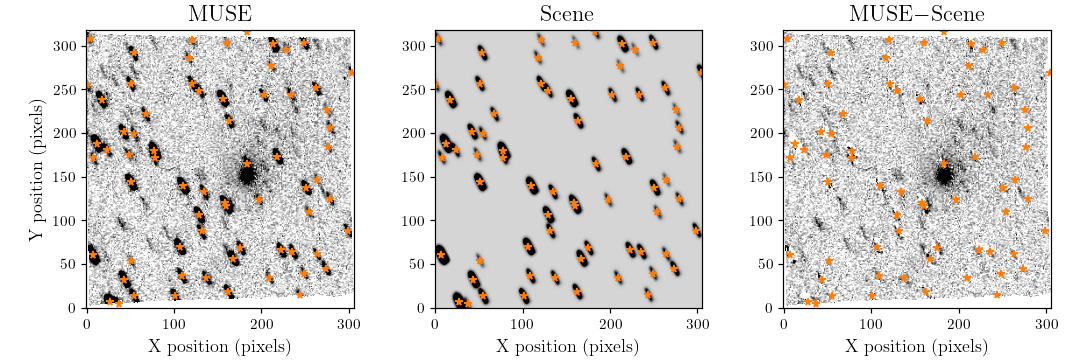

In [22]:
ind = 1800
image = test.cube[ind]#np.nanmedian(test.cube,axis=0)
scene = test.scene.sim[ind]#np.nanmedian(test.scene.sim,axis=0)
diff = test.diff[ind]#np.nanmedian(test.diff,axis=0)

vmin = np.nanpercentile(image,16)
vmax = np.nanpercentile(image,95)


from astropy.visualization import SqrtStretch, ImageNormalize

norm = ImageNormalize(vmin=vmin,vmax=vmax,stretch=SqrtStretch())

x = test.cat.xint + test.cat.x_offset
y = test.cat.yint + test.cat.y_offset

plt.figure(figsize=(1.5*fig_width*2,1*fig_width))
plt.subplot(131)
plt.title('MUSE',fontsize=15)
plt.imshow(image,origin='lower',vmin=vmin,vmax=vmax,cmap='gray_r')
plt.plot(x,y,'C1*',ms=5)

plt.xlabel('X position (pixels)',fontsize=12)
plt.ylabel('Y position (pixels)',fontsize=12)

plt.subplot(132)
plt.title('Scene',fontsize=15)
plt.imshow(scene,origin='lower',vmin=vmin,vmax=vmax,cmap='gray_r')
plt.plot(x,y,'C1*',ms=5)
plt.xlabel('X position (pixels)',fontsize=12)

plt.subplot(133)
plt.title('MUSE$ - $Scene',fontsize=15)
plt.imshow(diff,origin='lower',vmin=vmin,vmax=vmax,cmap='gray_r')
plt.plot(x,y,'C1*',ms=5)
plt.xlabel('X position (pixels)',fontsize=12)

plt.tight_layout()
#plt.savefig('Subtraction_example.pdf',bbox_inches='tight')

In [17]:
test.psf_param

array([  1.69264913,  15.96675213, -63.99377115])

<IPython.core.display.Javascript object>


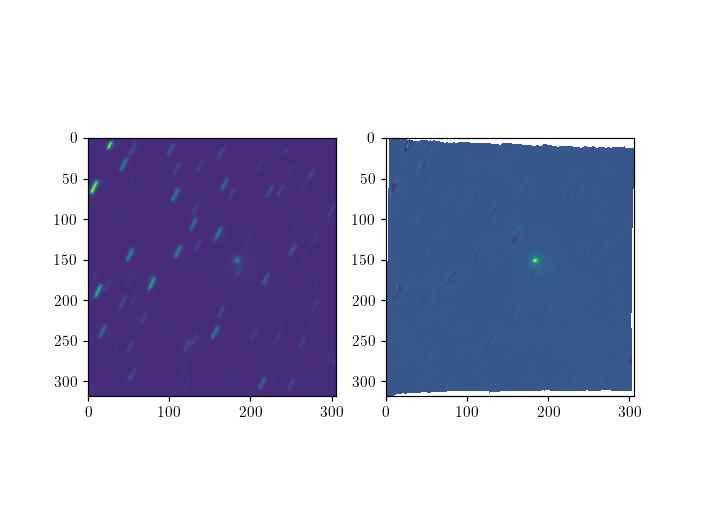

In [14]:
plt.figure()
plt.subplot(121)
plt.imshow(np.nansum(test.cube,axis=0))
plt.subplot(122)
plt.imshow(np.nanmedian(test.diff,axis=0))

In [3]:
corr_limit=0.9
order = 3
cors = deepcopy(test.cors)
cors[test.cat['cal_source'].values == 0] = 0
#cors[(test.cat['cal_source'].values == 1)][~test.good_cals] = 0

ind = np.argsort(test.cat[test.ref_filter].values)#
conds = np.where(((test.cors[ind] > corr_limit) | (test.cat['cal_source'].values[ind])) & (test.cat[test.ref_filter].values < test.cal_maglim))[0]
if len(conds) > 1:
    diffs = []
    for i in ind[conds]:
        print(test.cat[test.ref_filter].values[i])
        diffs += [test.models[i].sample(test.specs[i].wave) / test.specs[i].flux]
    diff = np.nanmedian(np.array(diffs),axis=0)
    fin = np.where(np.isfinite(diff))
    poly_param = np.polyfit(test.lam[fin],diff[fin],order)
    pf = np.polyval(poly_param,test.lam)
else:
    pf = np.ones_like(test.lam)

16.872631
17.472904
17.603271
17.861894999999997
17.891674


In [4]:
from scipy.signal import savgol_filter

In [5]:
ss = savgol_filter(diff,401,3)

<IPython.core.display.Javascript object>


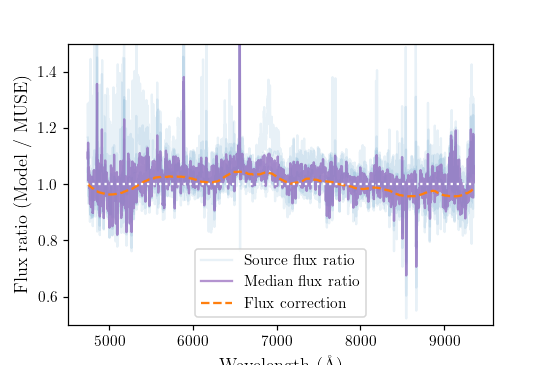

In [10]:
plt.figure(figsize=(1.5*fig_width,1*fig_width))
for i in range(len(diffs)):
    if i > 0:
        plt.plot(test.lam[fin],diffs[i][fin],'C0',alpha=0.1)
    else:
        plt.plot(test.lam[fin],diffs[i][fin],'C0',alpha=0.1,label='Source flux ratio')
plt.plot(test.lam[fin],diff[fin],'C4',alpha=0.7,label='Median flux ratio')
#plt.plot(test.lam[fin],pf,'C2',alpha=0.5,label='Model')
#plt.plot(test.lam[fin],ss,'C2',alpha=0.5,label='Model 2')
plt.plot(red_spec.wave,test.flux_corr,'C1--',label='Flux correction')
plt.axhline(1,color='white',ls=':')
plt.legend(loc='lower center')

plt.ylim(0.5,1.5)
plt.ylabel(r'Flux ratio (Model $/$ MUSE)',fontsize=12)
plt.xlabel(r'Wavelength ($\rm \AA$)',fontsize=12)

plt.savefig('Flux_correction_ck+.pdf',bbox_inches='tight')

In [112]:
test.lam[0] - test.lam[500]

-625.0000000000009

<IPython.core.display.Javascript object>


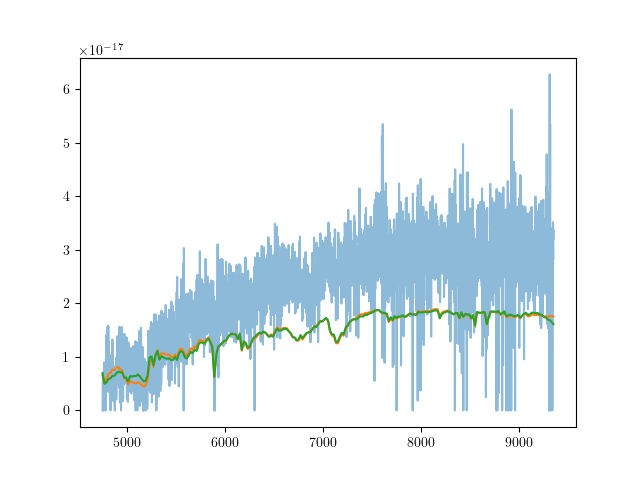

In [111]:
i = -10
plt.figure()
plt.plot(test.lam[fin],test.specs[i].flux ,'C0',alpha=0.5)
plt.plot(test.lam[fin],test.models[i].sample(test.specs[i].wave)/pf ,'C1')
plt.plot(test.lam[fin],test.models[i].sample(test.specs[i].wave)/ss ,'C2')


In [105]:
Ha = 6562.79
Hb = 4861.35
Hgam = 4340.472 #410.1734[2]	397.0075[2]	388.9064[2]	383.5397[2]

<IPython.core.display.Javascript object>


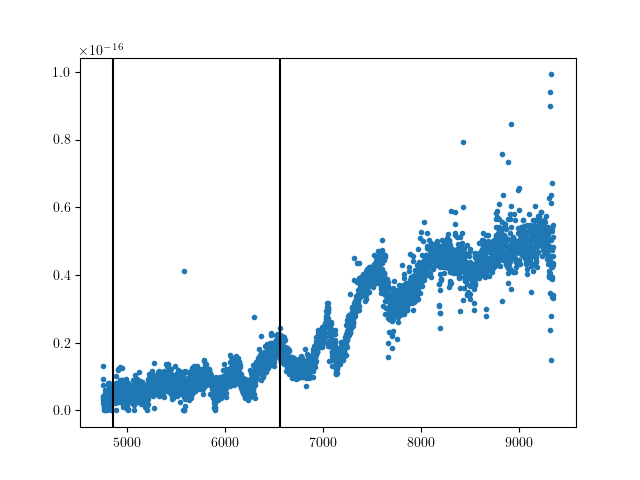

In [10]:
s = test.specs[redind]
plt.figure()
plt.plot(s.wave,s.flux,'.')
plt.axvline(Ha,color='k')
plt.axvline(Hb,color='k')